# Data Analysis of yield based on ‘security’

### LIBRARIES

In [27]:
import os
from IPython.display import Image
import csv
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import scipy as sci
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import decimal
from sklearn import tree
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

After importing the required libraries for the analysis, the first step of our analysis is to create some Python scripts that read multiple *.txt* files and store them into a dataframe. Each Python funtion is *self documented* in order to facilitate the readability of the code.

Please use *help(function_name)* to get the description of the function

This allows us to better manipulate our input parameters and output.

### READING INPUT PARAMETERS FROM ONE FILE

In [28]:
#LOAD INPUT FROM Decision_input_SA_official
def load_input_file (filename):
    'This function takes one .txt file and return a list of input parameters'
    inputfile=open(filename,"r")
    inList = [] #open file
    for line in inputfile:
        inList.append(line.strip())
    inputfile.close() #close file #loop over
    app = inList[2:]
    app_2 = app[0].replace("    ",",").split(',')
    input_list = [float(i) for i in app_2] 
    return input_list

### READING OUTPUT FROM ONE FILE

In [29]:
#LOAD OUTPUT FROM Decision_output_SA_official
def load_output_file (filename):
    'This function reads the output.txt file and return the root value as float number if found or indexes if not'
    outputfile=open(filename,"r")
    lst_strings=outputfile.readlines()
    string=','.join(lst_strings)
    pos=string.find('root:')
    if pos == -1: #The word root has not been found
        return pos
    else:
        try:
            return float(string[pos+9:pos+17])
        except ValueError:
            return -1

### READING INPUT/OUTPUT FROM ALL THE FILES

In [30]:
def load_all_files(directory ,function):
    """
    The function loops over the directory and it returns ALL the inputs or the output
    """
    Full_list=[]
    for filename in os.listdir(directory):
        if filename == '.DS_Store': #that should be only related if you use a mac
            continue
        Full_list.append(function(directory+filename))
    return Full_list
    

## CREATION OF THE DATASET

In order to run some analysis, a dataframe will be constructed. The first 3 decision variables will be removed from most of the data science methods since they are only constants.

In [32]:
Input_Parameters = load_all_files(directory='INPUT_OUTPUT_VERSIONS/input_versions/v3/',function=load_input_file)
Output=load_all_files(directory='INPUT_OUTPUT_VERSIONS/output_versions/v3_s/',function=load_output_file)
decisions_spreadsheet=pd.read_csv('decision_ranges_new.csv',header=None,float_precision='round_trip',index_col='dec_number',names=['dec_number','dec_name','fit_value','code','low_range','upper_range','nIntVal'])
dec_names=list(decisions_spreadsheet['dec_name'])

In [33]:
df=pd.DataFrame(Input_Parameters, columns =list(decisions_spreadsheet['dec_name']), dtype = float)
df['Output']=Output
n=df.shape[0]
df=df[df.Output != -1]
#In R I will build additional analyisis and I only bring covariates whose correlation with Yield >0.10 in abs value
df[['DS2 Prelm Plnnng Storage Trig [D]', 'SHT Upgrade Flag 1, 2 or 3 [D]','DS1 b (125ML/d) Storage Trig [D]','SHT STOR TRIG Pumping [D]','DS Illawa Constn. Storage Trig [D]','RESTRICTION L3 Stor Frac of L1 [D]','DST Constn Storage Trig [D]','DS2 StateExpn plnng Strge Frac [D]','DS2 ON Storage Fraction of DS1c[D]','RESTRICTION L1 Storage Trig [D]','Output']].to_csv('df_Security.csv',index=False)



In [34]:
df.head()

,DEMAND Annual [D],WARRAGAMBA E-flow Flag [D],WARRAGAMBA FSL Flag [D],DS2 Option Flag (1 or 2) [D],"SHT Upgrade Flag 1, 2 or 3 [D]",DS Illawa Option Flag (1 or 2) [D],DST Option Flag (1 or 2) [D],GW Kangal Option Flag (1 or 2) [D],Lnay/Wall Option Flag (1 or 2) [D],DS1 b (125ML/d) Storage Trig [D],...,GW Kangal-StorTrig Plan/Constr [D],GW Kangal-StorTrig Supply [D],Lnay/Wall-StorTrig Plan/Constr [D],Lnay/Wall-StorTrig Supply [D],DS Illawa Constn. Storage Trig [D],DS Illawa On Storage Trig [D],DST Constn Storage Trig [D],DST ON Storage Trig [D],DS2 ON Storage Fraction of DS1c[D],Output
0,576000.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.770447,...,0.310085,0.483900,0.500000,0.4,0.394625,0.256562,0.417557,0.335861,0.730000,570402.3
1,576000.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.662793,...,0.500000,0.400000,0.500000,0.4,0.497487,0.285045,0.250000,0.400000,0.730000,599746.6
2,576000.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.679257,...,0.500000,0.400000,0.500000,0.4,0.310000,0.800000,0.225983,0.400000,0.308454,534182.6
3,576000.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,0.611211,...,0.527089,0.472794,0.500000,0.4,0.310000,0.800000,0.250000,0.400000,0.810060,555052.0
4,576000.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.669889,...,0.500000,0.400000,0.300842,0.4,0.205764,0.235834,0.361291,0.400000,0.233469,571199.1


In [35]:
print("Python scripts were able to read "+str(round(df.shape[0]/n,3)*100)+"% of generated WATHNET output")

Python scripts were able to read 99.7% of generated WATHNET output


## SIMPLE EDA (EXPLANATORY DATA ANALYSIS)

In this section, we are mainly focused on checking the relationship between the Input Parameters and the output <b>Yield</b> through some data visualisation tools. Before doing that, let's look at the shape of the Output distribution and the summary statistics.

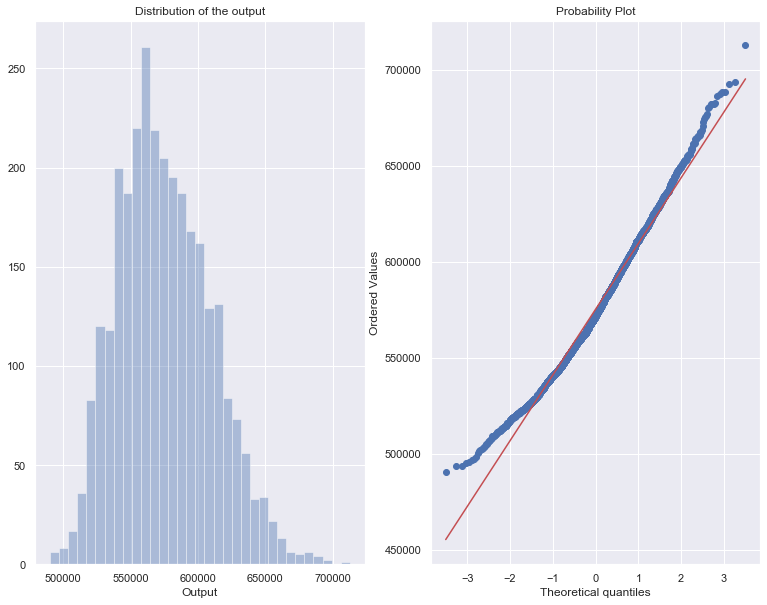

In [36]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,10))
plt.subplot(1, 2, 1)
plt.title('Distribution of the output')
sns.distplot(df['Output'],kde=False)
plt.subplot(1, 2, 2)
#beta = stats.beta(6, 3)
stats.probplot(df['Output'], dist="norm", plot=pylab)
pylab.show()

In [38]:
df['Output'].describe()

count      2991.000000
mean     575279.864025
std       34474.815987
min      490225.800000
25%      549881.000000
50%      571954.700000
75%      598500.200000
max      712786.500000
Name: Output, dtype: float64

The shape of the distribution is slightly right skewed. Various comments on the quartiles can be done. Comparing to the version with 1000 input parameters, we obtained a new maximum value of 730087.9 ML. It may be interested to investigate the reason behind this new maximum (<b>Local Interpretability for a Single Prediction</b>) 

The Quantile-Quantile plot can be used to check the distribution of the sample (might be normally distributed or maybe Gamma distributed)

### HEATMAP

A correlation matrix is built and then we try to see whether a heatmap can be useful for determine the strength of the relationship between X and Y.

The method used to calculate the correlation matrix is <b>Spearman</b>. <b>Spearman's correlation coefficient</b> measures the strength and direction of association between two variables.

However, <b>Spearman's correlation</b> determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines. The linearity restriction can be in fact too repressive for our scenario.

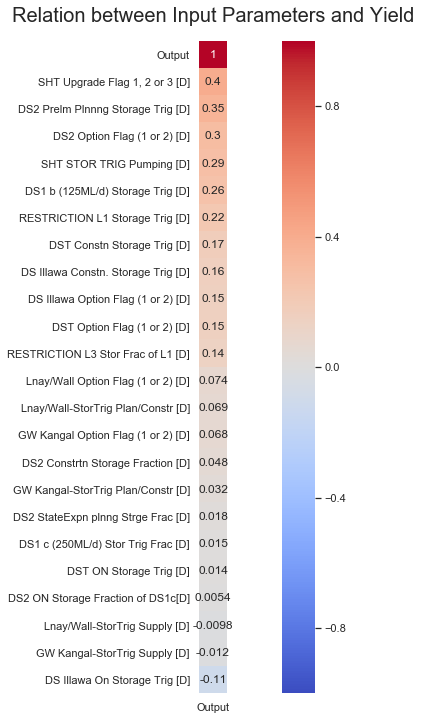

In [40]:
df1 = df.iloc[:, 3:] #we are not interested in the firts 3 columns
corrmat=df1.corr(method='spearman') #The entire correlation matrix
a=pd.DataFrame(corrmat['Output']) #we do not want the entire correlation matrix. Only cor(X,y)
a.sort_values(by='Output', ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.title('Relation between Input Parameters and Yield',fontsize =20,y=1.02)
sns.heatmap(a,vmin=-1, vmax=1, square= True,annot=True,cmap='coolwarm')

The heatmap above shows the relationship between the decision variables and the Yield. Absolute vaues of correlation higher than 0.10 (this threshold can change) might be interpreted as significant predictors of <b>Yield</b> and need to be considers for further analysis.

In particular:
<ul>
<li> There is a strong positive relation (0.51) between <b>DS2 Prelm Plnnng Storage Trig [D]</b> and <b>Yield</b>.    Hence, if this decision variable increases, the Yield increases too.</li>
<li>There is a good positive relationship (0.19) between <b>DS1 b (125ML/d) Storage Trig [D]</b> and <b>Yield</b>. Hence, if this decision variable increases, the Yield would decreases too.</li>
</ul>        

Comparing to the <b>DATA ANALYSIS OF YIELD BASED ON RELIABILITY</b> it looks like we have more decision variables correlated to the Output. However, we need to be carefully with MULTICOLLINEARITY. 

For example, <b>DS2 Prelm Plnnng Storage Trig [D]</b> and <b>DS2 Option Flag (1 or 2) [D]</b> are correlated (This was one of the domain constrain) to each other and with the <b>Yield</b>. Maybe, only one decision variable is linked to the output, while the other is not. Other possible interaction can be seen from this graph

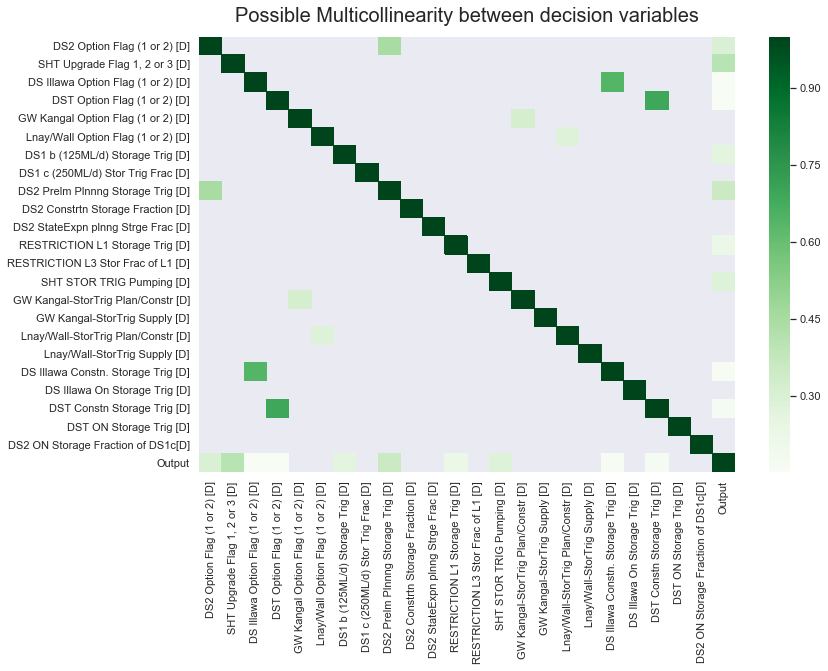

In [41]:
kot = corrmat[corrmat>=.15]
plt.figure(figsize=(12,8))
plt.title('Possible Multicollinearity between decision variables',fontsize =20,y=1.02)
sns.heatmap(kot, cmap="Greens")

### SCATTERPLOTS

Another data visualisation that can be used is a scatterplot between two variables by including one of the "categorical" variable in it. That might reveal some interesting insights about the dataset.

Next, we want to discover the relation between <b>*DS2 Prelm Plnnng Storage Trig [D]*</b> and <b>*Yield*</b> by grouping observations by the categorical variable <b>*SHT Upgrade Flag 1, 2 or 3 [D]*</b>. (Other similar graph can be done)

Text(0.5, 1.05, 'Relation between DS2 Prelm Plnnng Storage Trig and Yield ')

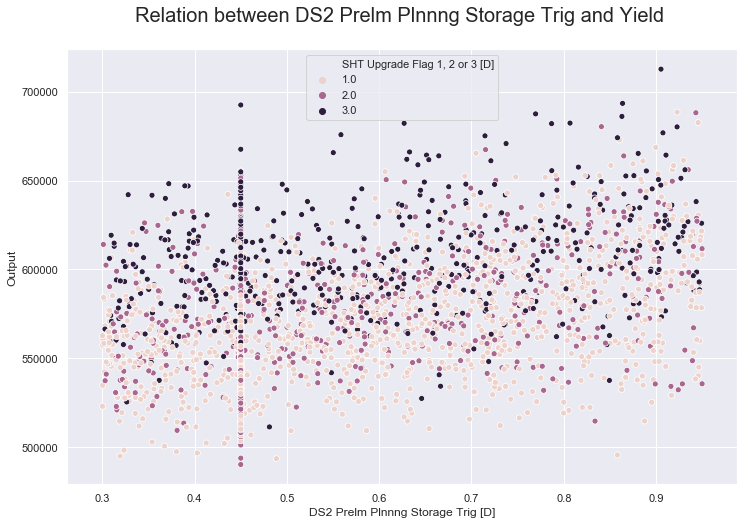

In [42]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.scatterplot(x="DS2 Prelm Plnnng Storage Trig [D]", y="Output",hue="SHT Upgrade Flag 1, 2 or 3 [D]",legend='full',data=df)
plt.title('Relation between DS2 Prelm Plnnng Storage Trig and Yield ',fontsize =20,y=1.05)
#Comment about the vertical line and asks about other potential combination
#SHT Upgrade Flag 1, 2 or 3 [D] for example

Based on the scatterplot, it seems like that observations with *SHT Upgrade Flag* =3 have higher yield comparing to the other variable flags. 

### BOXPLOTS

Lastly, if we are interesting to look at the relationship between *Yield* and one of the categorical variable, a boxplot is the most suitable graph. 

Text(0.5, 1.05, 'Relation between SHT Upgrade and Yield ')

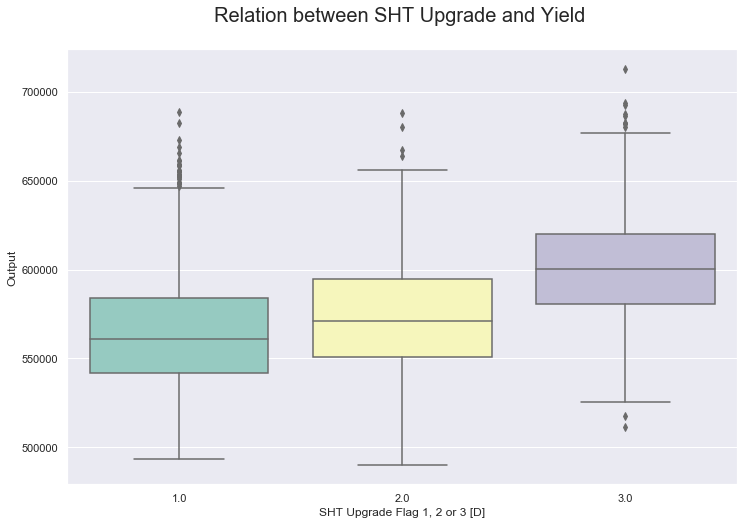

In [43]:
#DS2 Option Flag (1 or 2) [D]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.boxplot(x="SHT Upgrade Flag 1, 2 or 3 [D]", y="Output",data=df, palette="Set3")
plt.title('Relation between SHT Upgrade and Yield ',fontsize =20,y=1.05)

The median <b>Yield</b> when *SHT Upgrade Flag* is '3' is higher then the opposite situations.

This kind of graph might help us to better understand which particular category of a variable have a "better"/"worse" impact on the output of interest. If we are interested on minimizing the output("Cost") we would look at the smallest median with particular interest, while if we need to maximize the output("Yield") the opposite comments could be done.

## Interpretable models

One solution to interpreting black box models is to approximate them (either globally or locally) with an interpretable model

This approach aims to find out some relationship between input parameters and output by using some Machine Learning methods. It is important to emphasize that the goal is not building a good model for prediction, but only look at the FEATURE IMPORTANCE to try to identify which predictors have an impact on the dependent variable.

Knowing feature importance can benefit us in multiple ways, for example:

<ul>
<li>By getting a better understanding of the model’s logic</li>
<li>By removing x variables that are not that significant and have similar or better performance</li>
</ul>  


In [44]:
#predictors
X=np.array(df.iloc[:, 3:-1])
#output
y=np.array(df['Output'])

### Decision Tree and Random Forest

A <b>Decision Tree</b> is a method that can be used to divide up a large collection of data into successively smaller sets of records by applying a sequence of simple decision rules. Although they are mostly used for classification purposes, <b>Decision Trees</b> are also capable of performing regression tasks. The algorithm splits the dataset in a way that minimizes the MSE (mean squared error).

The idea here is to fit a tree into the dataset with no restriction. This is usually a bad habit for "predictive" purposes, as the model overfits the data badly. However, as we want to build some intuitions this approach is accepted.

Decision Trees play also an important role in <b>Random forest</b>, which is another well known supervised ML method.
Random forest in a ensemble learning technique which aggregates the prediction of several Decision Trees over different random samples (bagging).

In [45]:
tree_reg = DecisionTreeRegressor() #decision Tree
tree_reg.fit(X, y)
rf = RandomForestRegressor(n_estimators = 100) #Random Forest
rf.fit(X, y)
rf.score(X, y)

0.962012299064318

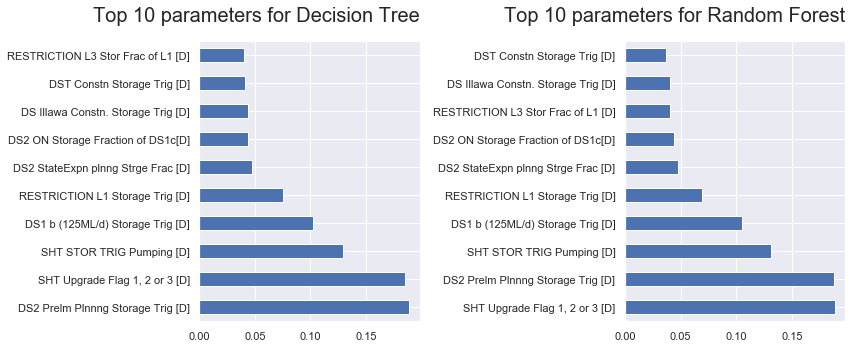

In [47]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
plt.subplot(1, 2, 1)
feat_importances=pd.Series(tree_reg.feature_importances_,dec_names[3:])
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 parameters for Decision Tree',fontsize =20,y=1.05,loc='right')
plt.subplot(1, 2, 2)
feat_importances_rf=pd.Series(rf.feature_importances_,dec_names[3:])
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Top 10 parameters for Random Forest',fontsize =20,y=1.05,loc='right')
figure.tight_layout()

Based on the above barchart, the best four parameters that have an influence on the Output are:

<ul>
<li><b>DS2 Prelm Plnnng Storage Trig [D]</b></li>
<li><b>SHT Upgrade Flag 1, 2 or 3 [D]</b></li>  
<li><b>DS1 b (125ML/d) Storage Trig [D]</b></li>
<li><b>DS2 StateExpn</b></li>    
</ul>  

This outcome provides some insights. The variation of <b>Yield </b>is influenced by these top 10 features. This means that, the remaining parameters are useless, and do not provide any information to the <b>Yield </b>. Two particular observation can be done:

<ul>
<li>The variable "DS2 Option Flag (1 or 2) [D]" is not within the important features, while we have shown that it was in the top 3 more correlated variables with Yield. The above heatmaps suggest that this variable was linked to <b>Yield </b> just because of the correlation with DS2 Prelm Plnnng Storage Trig   </li>
    
<li> Unexpectedly the variable "DS2 StateExpn plnn" is to fourth most important variable for <b>Yield </b>  </li>
</ul>  

Next, a <b>Decision Tree</b> visualization is provided. One of the advantage of this ML method is the easier interpretation of the results given by a sequence of *if-then-else* rules that are very intuitive for humans to understand.

In [48]:
tree_reg_2 = DecisionTreeRegressor(max_depth=4)
tree_reg_2.fit(X, y)
tree.export_graphviz(tree_reg_2,
                     out_file="tree.dot",
                     feature_names = dec_names[3:],
                     filled = True)
#remember to translate the "tree.dot" into "tree.png" on terminal for the visualization

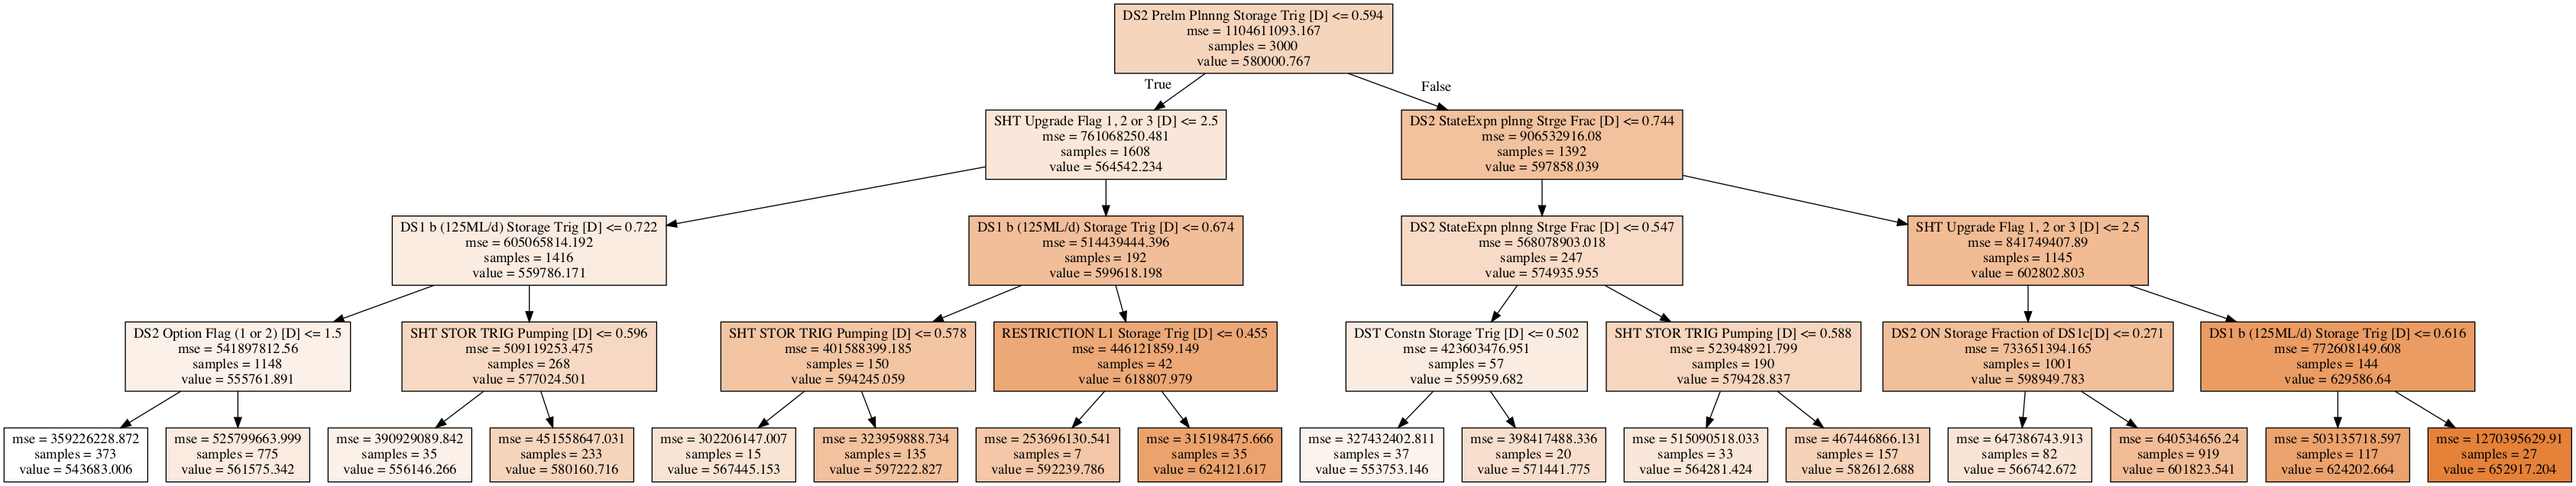

In [19]:
#Show this visualization in a .png for better zoomning
Image(filename='tree_v3_s.png',width = 1250, height = 1000)

We may notice that more than 3 variables (comparing to the yield for reliability) are used by the tree to split observations and they are the most important features obtained above.

In addition, we can comment one specific branch of the tree. The following chart shows the *if-then-else* rule that achieve one of the highest *expected value* of <b>Yield</b> 

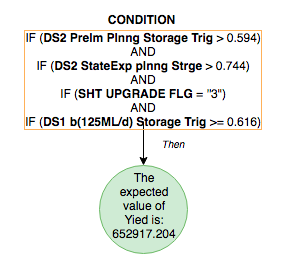

In [20]:
Image(filename='condition_Secu.png',width = 600)

### Multiple linear regression (see R)

In [21]:
#SEE R

## Model Agnostic Method

Model-agnostic methods work by changing the input of the machine learning model and measuring changes in the prediction output. [Add nice intro] 

### Permutation Feature Importance (TBD)

The concept is really straightforward: We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling/DELETING its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is "unimportant" if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction.

The ideal situation would be using the WATHNET5.0 to generate 23 different model's prediction and check maybe the mse between the permuted/deleted dataframe and the "observed" output.
If computationally too expensive we can use one of the *scikit* model(Random Forest) and use the library *eli5* to perform <b>Permutation feature importance</b> 

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X, y)
perm.feature_importances_


array([0.00445183, 0.4731996 , 0.00313898, 0.00273146, 0.00237595,
       0.00255969, 0.25592851, 0.01335104, 0.6204651 , 0.0164229 ,
       0.10441366, 0.12568316, 0.06575883, 0.31970441, 0.00853564,
       0.00427149, 0.01673984, 0.00436869, 0.06567839, 0.00442896,
       0.05873009, 0.00758812, 0.07697977])

Text(0.5, 1.05, 'Permutation feature importance')

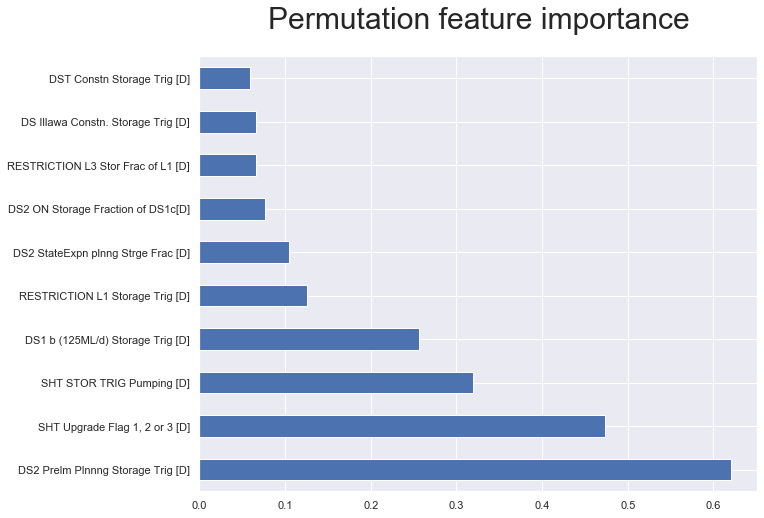

In [50]:
feat_importances=pd.Series(perm.feature_importances_,dec_names[3:])
sns.set(rc={'figure.figsize':(10,8)})
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Permutation feature importance',fontsize =30,y=1.05)

The <b>Permutation feature importance</b> technique confirms the same best four variables for Yield

### Partial Dependence Plot (PDP) & Individual Conditional Expectation (ICE) &Feature Interaction

In [24]:
#see R